# Построение движка для игр на pygame - урок 2

## Повторение

Итак у нас есть основа для создания игры, которая лежит в модуле __first_engine.game__

In [1]:
"""
Модуль с основным классом-конструктором Game - для создания игры.
"""

import pygame


class Game:
    """
    Класс-конструктор, содержит основные методы и переменные для написания игр
    """

    runner = True

    def __init__(self, width=400, height=300):
        """
        :parameter width: высота окна
        :parameter height: ширина окна
        """
        self.width = width
        self.height = height

        self.parentSurface = pygame.display.set_mode(
            size=(width, height)
        )  # родительское окно

    @staticmethod
    def events():
        return pygame.event.get()

    def close(self, event) -> None:
        if event.type == 256 or (event.type == 768 and event.key == 27):  # если нажал крестик или ESC
            pygame.quit()  # деинициализируем pygame
            self.runner = False  # отключаем цикл

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


На основе нее мы можем создать класс-наследник поторуй имеет все теже переменные и методы что и его родительский класс. То есть теперь для создания игры нам больше не нужно все подробно описывать, а просто запускаем все что нам нужно

In [1]:
from first_engine.game import Game


class FirstGame(Game): # Создаем игру на основе Game

    def run(self) -> None: # создаем метод для запуска игры

        while self.runner: # запускаем игровой цикл
            for event in self.events(): # отслеживаем события
                self.close(event) # подключаем метод закрывающий окно


FirstGame(width=600, height=400).run() # инициализация игры и запуск

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## 1. Создание движущихся объектов

Родительский класс Game создает объект - игра, и все остальные объекты внутри игры так же будут создаваться на основе классов.

Первое что мы создадим - обычный квадрат, что бы потренироваться на нем

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        pygame.draw.rect(
            surface=self.parentSurface, # где отрисовываться
            color=(255, 255, 255), # цвет, квадрата
            rect=(50, 50, 100, 100) # положение: X, Y и размер: Width, Height
        )
        pygame.display.update() # обновление окна

        while self.runner:
            for event in self.events():
                self.close(event)


FirstGame().run()

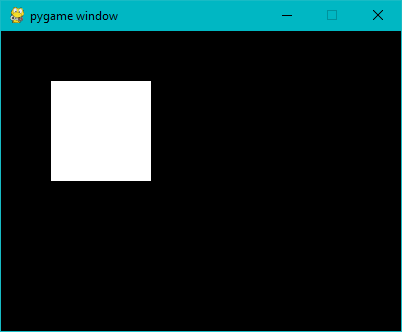

Но при таком отображении мы создаем статический квадрат, если мы захотим что бы он двигался, то его нужно поместить внутри гравного цикла, и обновлять окно там же

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        while self.runner:
            for event in self.events():
                self.close(event)

            pygame.draw.rect(
                surface=self.parentSurface,  # где отрисовываться
                color=(255, 255, 255),  # цвет, квадрата
                rect=(50, 50, 100, 100)  # положение: X, Y и размер: Width, Height
            )
            pygame.display.update()  # обновление окна


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
"""
Модуль с основным классом-конструктором Game - для создания игры.
"""

import pygame


class Game:
    """
    Класс-конструктор, содержит основные методы и переменные для написания игр
    """

    runner = True

    def __init__(self, width=400, height=300): ...

    @staticmethod
    def display_update():
        pygame.display.update()

    @staticmethod
    def events(): ...

    def close(self, event) -> None: ...

- В классе Game создадим статический метод __display_update__

Теперь мы можем сделать так что бы квадрат мог перемещаться, для этого нужно вынести положение Y, X за цикл, а обновлять их показатели внутри цикла

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        x, y = 50, 50

        while self.runner:
            for event in self.events():
                self.close(event)

            pygame.draw.rect(
                surface=self.parentSurface,  # где отрисовываться
                color=(255, 255, 255),  # цвет, квадрата
                rect=(x, y, 100, 100)  # положение: X, Y и размер: Width, Height
            )
            pygame.display.update()  # обновление окна

            x += 1
            y += 1


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


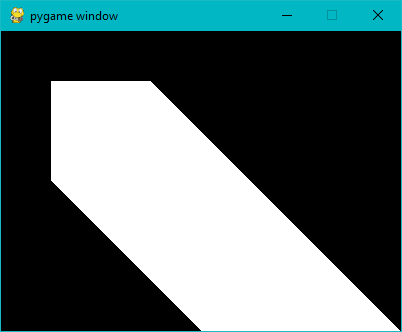

Теперь наш квадрат перемещавется по экрану, но мы столкнулись с проблемой - он перемещается слишком быстро.<br>
Попробуем уменьшить значение

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        x, y = 50, 50

        while self.runner:
            for event in self.events():
                self.close(event)

            pygame.draw.rect(
                surface=self.parentSurface,  # где отрисовываться
                color=(255, 255, 255),  # цвет, квадрата
                rect=(x, y, 100, 100)  # положение: X, Y и размер: Width, Height
            )
            pygame.display.update()  # обновление окна

            x += 0.002
            y += 0.002


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## 2. Управление FPS

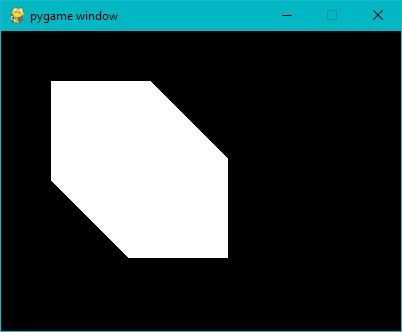

Теперь он движется медленнее, но не достаточно плавно, а иногда его скорость меняется

Что бы это исправить нужно создать объект который бы управлял частотой обновления кадров

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:
        
        clock = pygame.time.Clock() # счетчик FPS

        x, y = 50, 50

        while self.runner:
            for event in self.events():
                self.close(event)
                
            pygame.draw.rect(
                surface=self.parentSurface,  # где отрисовываться
                color=(255, 255, 255),  # цвет, квадрата
                rect=(x, y, 100, 100)  # положение: X, Y и размер: Width, Height
            )
            pygame.display.update()  # обновление окна

            x += 1
            y += 1
            
            clock.tick(60)


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


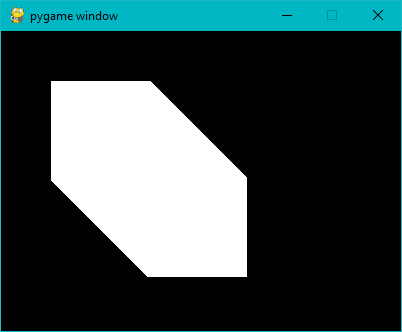

Теперь мы можем управлять характером движения квадрата, регулируя число FPS и прибавляемым число к координатам:
- Добавим объект __clock__ в класс Game
- ДОбавим в Game метод __fps_counter__ принимающий число FPS

In [ ]:
import pygame


class Game:

    ...
    clock = pygame.time.Clock()  # счетчик FPS

    def __init__(self, width=400, height=300): ...

    def fps_counter(self, FPS=30):
        """
        Метод уравляущий частотой обновления кадров
        :param FPS: число кадров в секунду
        :return: None
        """
        self.clock.tick(FPS)

    @staticmethod
    def events(): ...

    def close(self, event) -> None: ...

## 3. Управление движущимися объектами

Напомню, что через __event__ мы можем отслеживать события кроисходящие в родительском окне<br>
Давайте привяжем движение квадрата к клавишам __WASD__

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        x, y = 50, 50

        while self.runner:
            for event in self.events():
#                 print(event) # отслеживание событий
                self.close(event)
                
                if event.type == 768:
                    if event.key == 119:  # W
                        y -= 10
                    if event.key == 115:  # S
                        y += 10
                    if event.key == 97:  # A
                        x -= 10
                    if event.key == 100:  # D
                        x += 10

            pygame.draw.rect(
                surface=self.parentSurface,  # где отрисовываться
                color=(255, 255, 255),  # цвет, квадрата
                rect=(x, y, 100, 100)  # положение: X, Y и размер: Width, Height
            )
            pygame.display.update()  # обновление окна

            self.fps_counter(FPS=60)


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


Теперь квадрат движется при каждом нажатии на клавиши

Но нам не удобно отслеживать движение квадрата из-за того, что квадрат перекрашивает пиксели через которые проходит.<br>
Что бы этого не происходило нам в начале каждой итерации цикла нужно закрашивать родительское окно.

In [ ]:
import pygame
from first_engine.game import Game


class FirstGame(Game):

    def run(self) -> None:

        x, y = 50, 50

        while self.runner:
            self.parentSurface.fill((0, 0, 0))  # заливаем родительское окно

            for event in self.events(): ...

            pygame.draw.rect(
                surface=self.parentSurface,
                color=(255, 255, 255),
                rect=(x, y, 100, 100)
            )
            pygame.display.update()

            self.fps_counter(FPS=60)


FirstGame().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


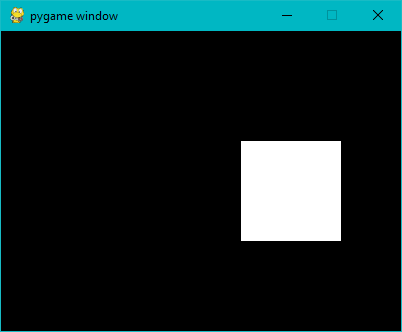

Теперь родительское окно не перекрашивается в цвет квадрата при его перемещении
- в Game методу __init__ добавим еще один аргумент __color__ со значением по умолчанию (0, 0, 0) - черный
- в том же методе сразу после создания окна будем заливать его в __color__
- создадим в Game метод __window_fill__ при вызове которого будем заливать окно в тот цвет, который назначается при инициализации игры

In [ ]:
import pygame


class Game:
    ...

    def __init__(self, width=400, height=300, color=(0, 0, 0)):
        ...

        self.parentSurface = pygame.display.set_mode(
            size=(width, height)
        )  # родительское окно
        self.parentSurface.fill(color)

    @staticmethod
    def display_update():...

    @staticmethod
    def events():...

    def window_fill(self):
        """
        Метод при вызове которого заливается родительское окно
        :return: None
        """
        self.parentSurface.fill(self.color)  # заливаем родительское окно

    def fps_counter(self, FPS=30) -> None:...

    def close(self, event) -> None:...

# Задание:

На основе нашего текущего движка напишите графичeский редактор:

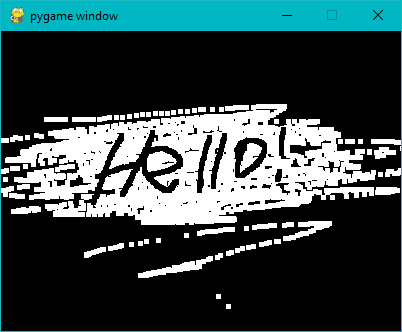

- найдите в event собития которые отвечают за нажатие и отжатие кнопок мыши, а так же событие отвечающее за движение мыши
    - найдите ключи событий, которые отвечают за то, какая кнопка мыши была нажата
        - если нажата левая кнопка то можно рисовать
        - если правая то можно стирать нарисованное
        
- дополнительно привяжите любую клавишу при нажатии на которую все окно очищается